In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [100]:
no_pages = 60
def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.availability%255B%255D%3DExclude%2BOut%2Bof%2BStock&otracker=clp_metro_expandable_5_25.metroExpandable.METRO_EXPANDABLE_iPhone_mobile-phones-store_92RED14GXPXF_wp16&fm=neo%2Fmerchandising&iid=M_e31871fe-1c0c-4c16-97b6-fa7d48abdd6b_25.92RED14GXPXF&ssid=ybiqhb9e0w0000001618383749500&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DAPPLE&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DHonor&p%5B%5D=facets.brand%255B%255D%3DHuawei&p%5B%5D=facets.brand%255B%255D%3DOPPO&p%5B%5D=facets.brand%255B%255D%3DNokia&p%5B%5D=facets.brand%255B%255D%3DHTC&p%5B%5D=facets.brand%255B%255D%3DKARBONN&p%5B%5D=facets.brand%255B%255D%3DMicromax&p%5B%5D=facets.brand%255B%255D%3DPHILIPS&p%5B%5D=facets.brand%255B%255D%3DPanasonic&p%5B%5D=facets.brand%255B%255D%3DREDMI&p%5B%5D=facets.brand%255B%255D%3DViVO&page='+str(pageNo), headers=headers)#, proxies=proxies)
    #print(r)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup.prettify())
    alls = []
    for d in soup.findAll('div', attrs={'class':'_3pLy-c row'}):
        name = d.find('div', attrs={'class':'_4rR01T'})
        star = d.find('div', attrs={'class':'_3LWZlK'})
        rating = d.find('span', attrs={'class':'_2_R_DZ'})
        offer = d.find('div', attrs={'class':'_3Ay6Sb'})
        originalprice = d.find('div', attrs={'class':'_3I9_wc _27UcVY'})
        offerprice = d.find('div', attrs={'class':'_30jeq3 _1_WHN1'})

        all1=[]

        if name is not None:
            all1.append(name.text)
        else:
            all1.append("unknown-product")

        if star is not None:
            all1.append(star.text)
        else:    
                all1.append('0')

        if rating is not None:
            all1.append(rating.text)
        else:
            all1.append('0')

        if offer is not None:
            all1.append(offer.text)
        else:
            all1.append('0')     

        if originalprice is not None:
            all1.append(originalprice.text)
        else:
            all1.append('0')
            
        if offerprice is not None:
            all1.append(offerprice.text)
        else:
            all1.append('0')
            
        alls.append(all1)    
    return alls

In [101]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
    flatten = lambda l: [item for sublist in l for item in sublist]
    #print('-------------------------------- \n',results)
    df = pd.DataFrame(flatten(results),columns=['Name','Star','Rating','Offer', 'OriginalPrice','OfferPrice'])
    df.to_csv('mobile_products.csv', index=False, encoding='utf-8')

In [288]:
df = pd.read_csv("mobile_products.csv")

In [289]:
df.head(5)

,Name,Star,Rating,Offer,OriginalPrice,OfferPrice
0,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4.4,200 Ratings & 15 Reviews,15% off,"₹12,999","₹10,999"
1,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",4.4,200 Ratings & 15 Reviews,15% off,"₹12,999","₹10,999"
2,"REDMI 9i (Sea Blue, 64 GB)",4.3,"2,47,061 Ratings & 14,042 Reviews",20% off,"₹9,999","₹7,999"
3,"REDMI 9i (Nature Green, 64 GB)",4.3,"2,47,061 Ratings & 14,042 Reviews",20% off,"₹9,999","₹7,999"
4,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",4.4,200 Ratings & 15 Reviews,14% off,"₹13,999","₹11,999"


In [290]:
df_unknown=df[df['Name']=='unknown-product']
df_unknown.shape

(0, 6)

In [291]:
df['Ratings'] = df['Rating'].apply(lambda x: x.split()[0])
df["OriginalPrice"] = df["OriginalPrice"].str.replace('₹', '')
df["OfferPrice"] = df["OfferPrice"].str.replace('₹', '')
df["OfferPercent"] = df["Offer"].str.replace('% off', '')
df["Reviews"] = df["Rating"].str.replace('Reviews', '')

In [292]:
df["Reviews"] = df["Reviews"].apply(lambda x: x.split()[-1])
df['Mobile'] = df['Name'].apply(lambda x: x.split()[0])
df['SDSize'] = df['Name'].apply(lambda x: x.split()[-2])
df['Type'] = df['Name'].apply(lambda x: x.split()[1])

In [293]:
df["OriginalPrice"] = df["OriginalPrice"].str.replace(',', '')
df["OfferPrice"] = df["OfferPrice"].str.replace(',', '')
df["Ratings"] = df["Ratings"].str.replace(',', '')
df["Reviews"] = df["Reviews"].str.replace(',', '')

In [375]:
df['OfferPrice'] = df['OfferPrice'].astype(int)
df['OriginalPrice'] = df['OfferPrice'].astype(int)
df['Ratings'] = df['Ratings'].astype(int)
df['Reviews'] = df['Reviews'].astype(int)
df["OfferPercent"] = df["OfferPercent"].astype(int)

In [295]:
df['Colour'] = df['Name'].str.replace('GB', '')

In [296]:
df['Colour'] = df['Colour'].str.split('(').str[1]

In [297]:
df['Colour'] = df['Colour'].str.split(',').str[0]

In [298]:
df['ProductName'] = df['Name'].str.split('(').str[0]

In [299]:
df.head()

,Name,Star,Rating,Offer,OriginalPrice,OfferPrice,Ratings,OfferPercent,Reviews,Mobile,SDSize,Type,Colour,ProductName
0,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",4.4,200 Ratings & 15 Reviews,15% off,10999,10999,200,15,15,SAMSUNG,64,Galaxy,Sky Blue,SAMSUNG Galaxy F12
1,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",4.4,200 Ratings & 15 Reviews,15% off,10999,10999,200,15,15,SAMSUNG,64,Galaxy,Sea Green,SAMSUNG Galaxy F12
2,"REDMI 9i (Sea Blue, 64 GB)",4.3,"2,47,061 Ratings & 14,042 Reviews",20% off,7999,7999,247061,20,14042,REDMI,64,9i,Sea Blue,REDMI 9i
3,"REDMI 9i (Nature Green, 64 GB)",4.3,"2,47,061 Ratings & 14,042 Reviews",20% off,7999,7999,247061,20,14042,REDMI,64,9i,Nature Green,REDMI 9i
4,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",4.4,200 Ratings & 15 Reviews,14% off,11999,11999,200,14,15,SAMSUNG,128,Galaxy,Sky Blue,SAMSUNG Galaxy F12


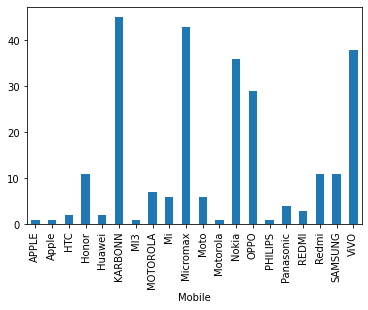

In [306]:
df.groupby('Mobile')['Type'].nunique().plot(kind='bar')
plt.show()

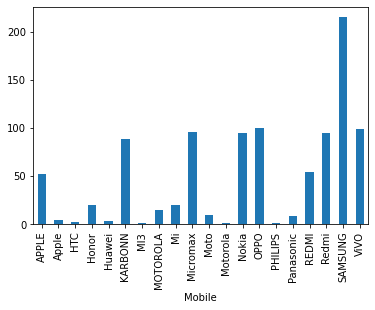

In [309]:
df.groupby('Mobile')['Mobile'].count().plot(kind='bar')
plt.show()

In [310]:
df.groupby('Mobile', as_index=False).agg({"Ratings": "sum"})

,Mobile,Ratings
0,APPLE,864273
1,Apple,435010
2,HTC,918
3,Honor,1348659
4,Huawei,3582
5,KARBONN,115178
6,MI3,15187
7,MOTOROLA,244857
8,Mi,2005948
9,Micromax,350429


In [323]:
df.groupby('Mobile', as_index=False).agg({"Reviews": "sum"})

,Mobile,Reviews
0,APPLE,69827
1,Apple,37050
2,HTC,294
3,Honor,136052
4,Huawei,918
5,KARBONN,11890
6,MI3,5132
7,MOTOROLA,23920
8,Mi,303261
9,Micromax,38287


Text(0.5, 0, 'Mean price')

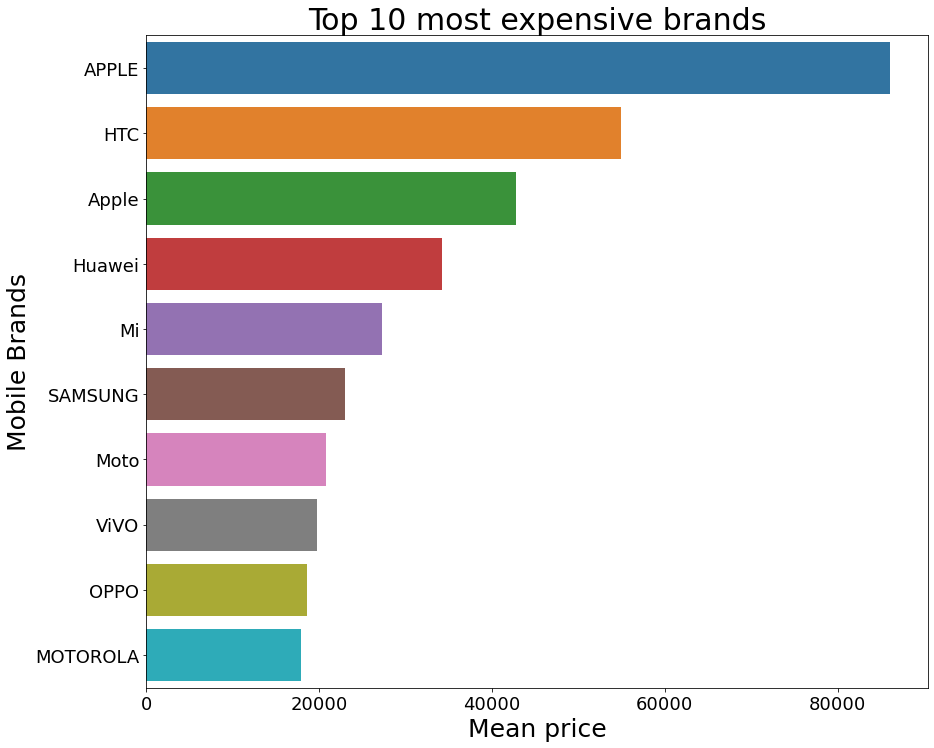

In [368]:
group = df.groupby (df.Mobile)
ranking = pd.DataFrame(group.OfferPrice.mean())
ranking.reset_index(level = 0, inplace=True)
ranking = ranking.sort_values(by='OfferPrice', ascending = False).head(10)

plt.figure(figsize=(14,12))
sns.barplot(x = 'OfferPrice', y = 'Mobile', data = ranking, orient = 'h')
plt.title('Top 10 most expensive brands', fontsize = 30)
plt.ylabel('Mobile Brands', fontsize = 25)
plt.xlabel('Mean price', fontsize = 25)

In [349]:
!pip install squarify 

In [350]:
import squarify 

(0.0, 100.0, 0.0, 100.0)

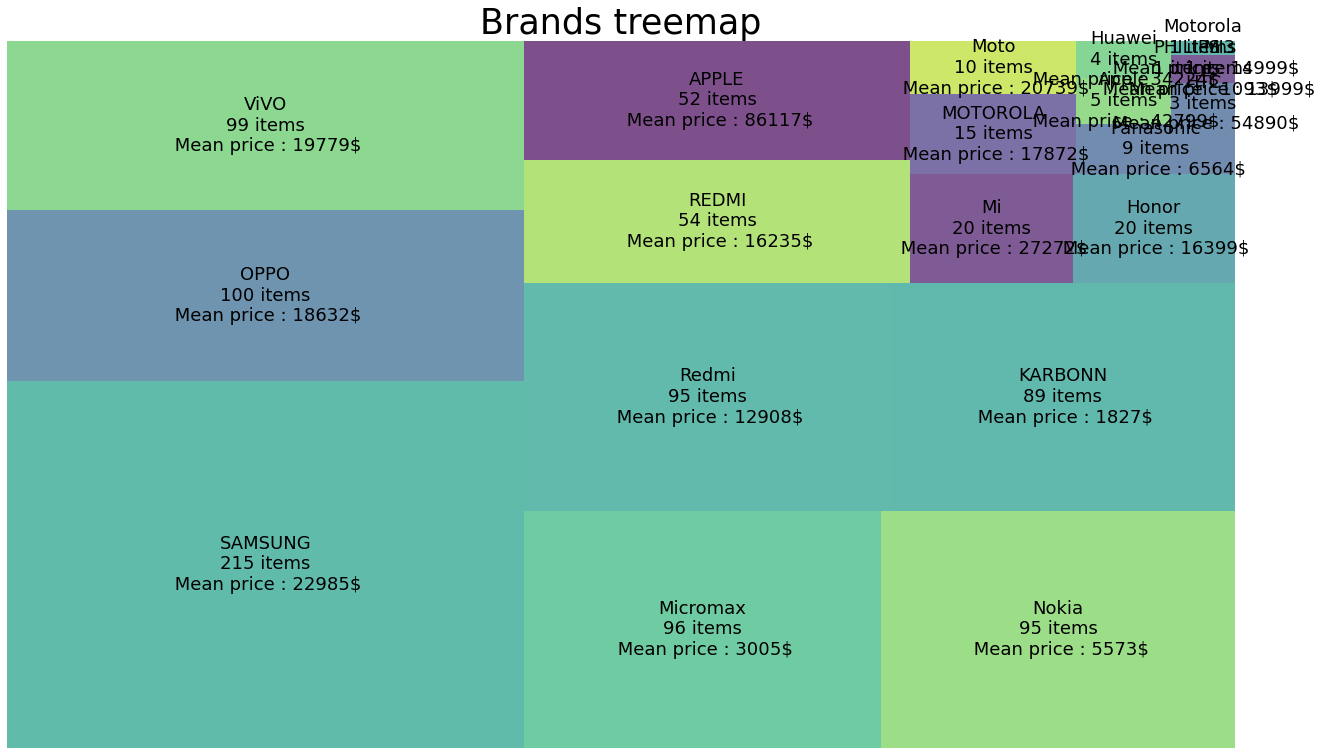

In [353]:
# Brands sorted by number of item
brands = pd.DataFrame(df.Mobile.value_counts())
brands.reset_index(level = 0, inplace=True)
brands = brands.sort_values(by='Mobile', ascending = False)
brands.columns = ('Mobile', 'number_of_item')

# Brands by price
group = df.groupby (df.Mobile)
brands_prices = pd.DataFrame(group.OfferPrice.mean())
brands_prices.reset_index(level = 0, inplace=True)
# Merging
brands = pd.merge(brands, brands_prices,on='Mobile')

# Labels setting
labels = ["%s\n%d items\n Mean price : %d$" % (label) \
          for label in zip(brands['Mobile'], brands['number_of_item'], brands['OfferPrice'])]

# Plotting
plt.figure(figsize=(22,13))
plt.rc('font', size=18)
squarify.plot(sizes = brands['number_of_item'], label = labels, alpha = .7)
plt.title('Brands treemap', fontsize = 35)
plt.axis('off')

Text(0.5, 0, 'Number of products in that Mobile Brand')

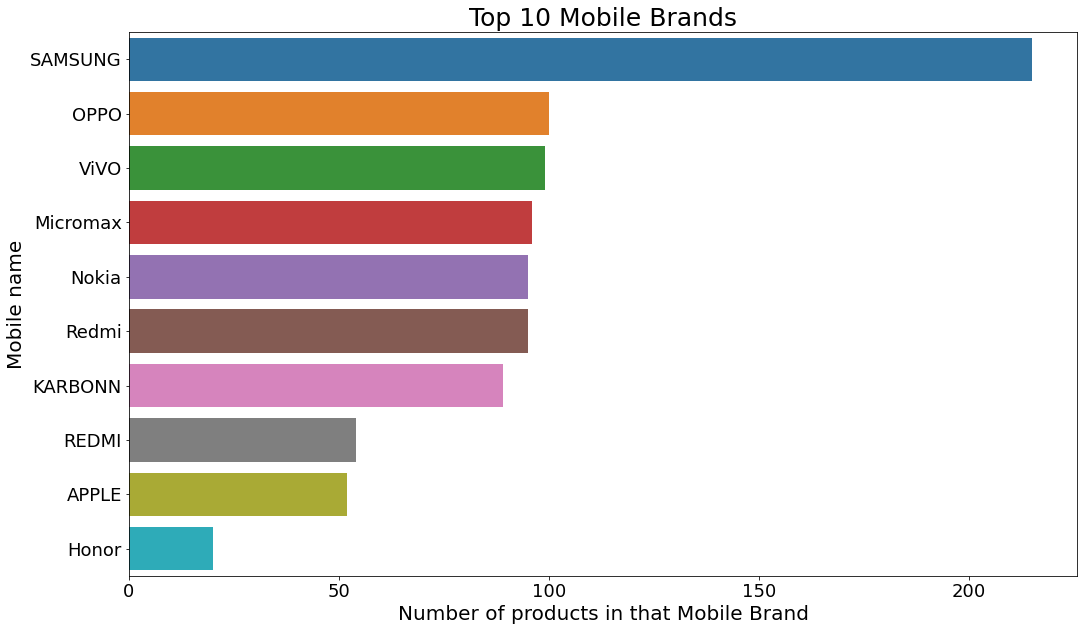

In [358]:
plt.figure(figsize=(17,10))
sns.countplot(y = df.Mobile, \
              order = df.Mobile.value_counts().iloc[:10].index, \
                                                      orient = 'v')
plt.title('Top 10 Mobile Brands', fontsize = 25)
plt.ylabel('Mobile name', fontsize = 20)
plt.xlabel('Number of products in that Mobile Brand', fontsize = 20)

Text(0.5, 0, 'Number of products in that Colour')

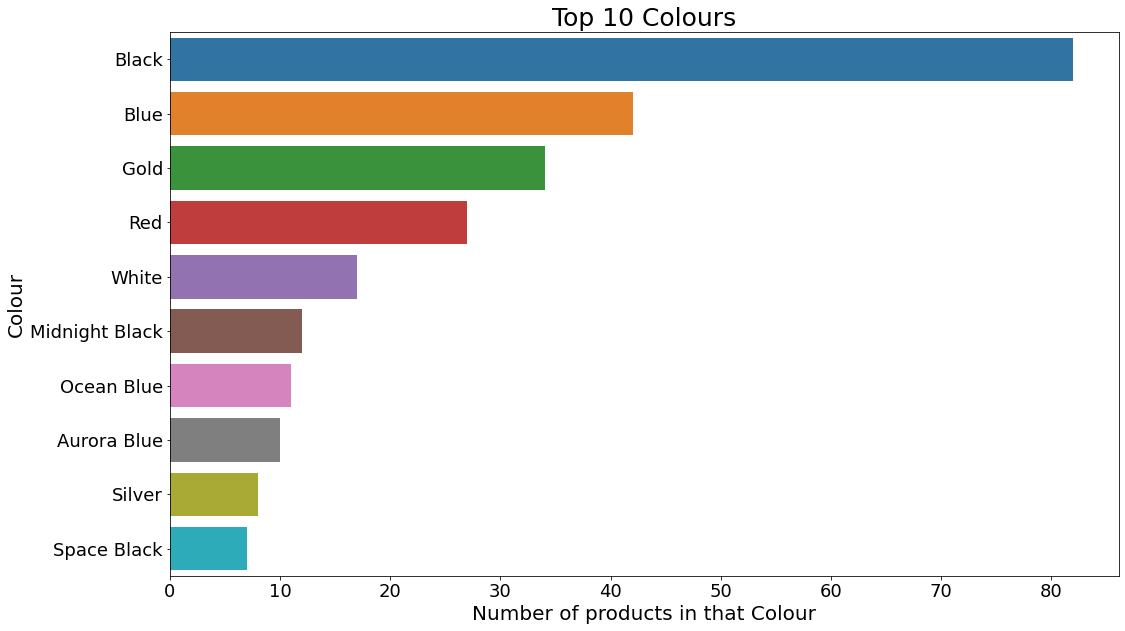

In [366]:
plt.figure(figsize=(17,10))
sns.countplot(y = df.Colour, \
              order = df.Colour.value_counts().iloc[:10].index, \
                                                      orient = 'v')
plt.title('Top 10 Colours', fontsize = 25)
plt.ylabel('Colour', fontsize = 20)
plt.xlabel('Number of products in that Colour', fontsize = 20)

In [377]:
from wordcloud import WordCloud, STOPWORDS

<ipython-input-391-22d381962df4>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  exp.name = exp.ProductName.str.upper()


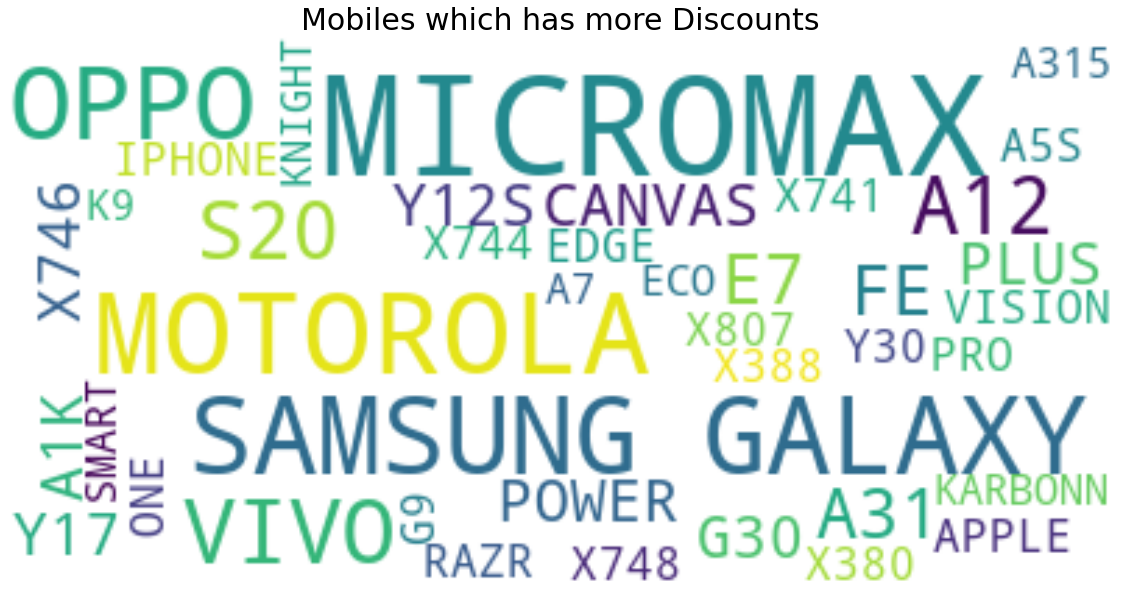

In [391]:
exp = df[df['OfferPercent'] > 25]
exp.name = exp.ProductName.str.upper()

wc = WordCloud(background_color="white", max_words=5000, 
               stopwords=STOPWORDS, max_font_size= 50)

wc.generate(" ".join(str(s) for s in exp.name.values))

plt.figure(figsize=(20,12))
plt.title('Mobiles which has more Discounts ', fontsize = 30)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

<ipython-input-390-d74ae7744659>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  exp.name = exp.ProductName.str.upper()


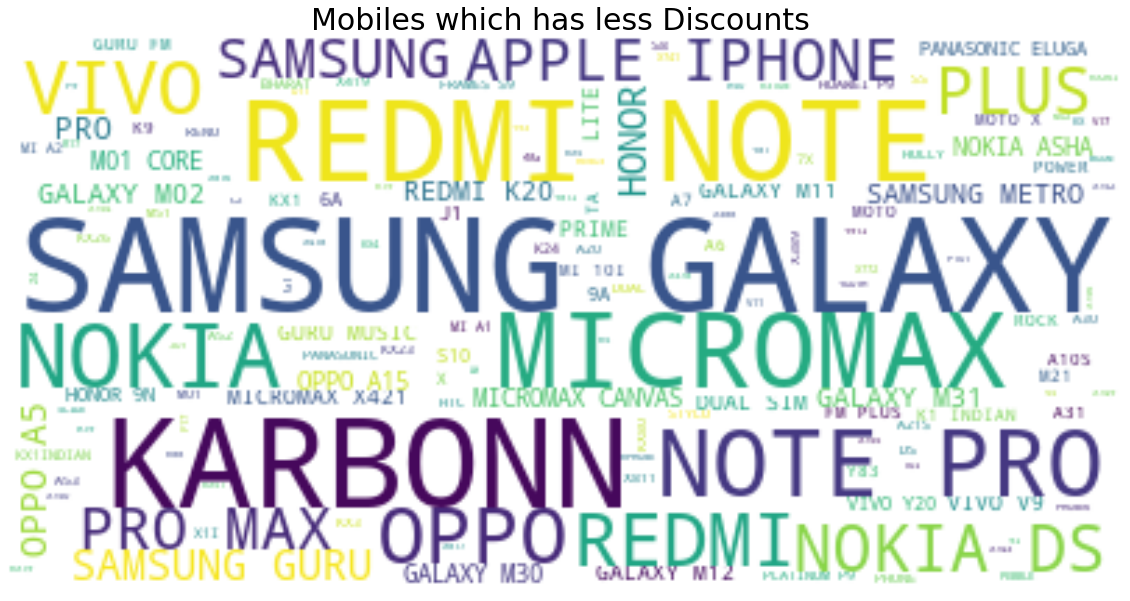

In [390]:
exp = df[df['OfferPercent'] < 5]
exp.name = exp.ProductName.str.upper()

wc = WordCloud(background_color="white", max_words=5000, 
               stopwords=STOPWORDS, max_font_size= 50)

wc.generate(" ".join(str(s) for s in exp.name.values))

plt.figure(figsize=(20,12))
plt.title('Mobiles which has less Discounts ', fontsize = 30)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')